# Lab1 - Regex

# Imports

In [1]:
from datasets import load_dataset
import regex as re
from collections import defaultdict
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
ds = load_dataset("clarin-knext/fiqa-pl", "corpus")

In [3]:
texts = ds["corpus"]["text"]

# 1. Creating regexes/regexen

Google says it's plural of regex

### Making the hour regex

In [4]:
# lookbehind - begin with any character other than ":" or digits
begin = r"(?<![0-9:])"

hours = r"(?:[0-1]?[0-9]|2[0-3])"

minutes = r":[0-5][0-9]"

seconds = r"(?::[0-5][0-9])?"

# lookahead - end with any character other than ":" or digits
end = r"(?![0-9:])"

hour_regex = begin + "(" + hours + minutes + seconds + ")" + end

hour_regex

'(?<![0-9:])((?:[0-1]?[0-9]|2[0-3]):[0-5][0-9](?::[0-5][0-9])?)(?![0-9:])'

In [5]:
print(re.findall(hour_regex, "9:37:00 9:37:01"))

['9:37:00', '9:37:01']


In [6]:
print(re.findall(hour_regex, "21:37:13"))
print(re.findall(hour_regex, "21:37"))
print(re.findall(hour_regex, "9:37:00"))

print(re.findall(hour_regex, "21:37"))

print(re.findall(hour_regex, "21:37:69"))
print(re.findall(hour_regex, "021:37:00"))
print(re.findall(hour_regex, "21:37:00:13"))
print(re.findall(hour_regex, "13:21:37:00"))
print(re.findall(hour_regex, ":21:37"))
print(re.findall(hour_regex, "21:37:"))

['21:37:13']
['21:37']
['9:37:00']
['21:37']
[]
[]
[]
[]
[]
[]


Correct patterns are detected. Incorrect ones are not. Exactly what we're asking for

### Creating the month regex

In [7]:
month_dopelniacz = [
    "[Ss]tycznia",
    "[Ll]utego",
    "[Mm]arca",
    "[Kk]wietnia",
    "[Mm]aja",
    "[Cc]zerwca",
    "[Ll]ipca",
    "[Ss]ierpnia",
    "[Ww]rześnia",
    "[Pp]aździernika",
    "[Ll]istopada",
    "[Gg]rudnia",
]
month_regex = r"[1-3]?[0-9] (?:" + "|".join(month_dopelniacz) + ")"

print(re.findall(month_regex, "11 września"))
print(re.findall(month_regex, "2 grudnia"))

['11 września']
['2 grudnia']


---

# 2. Detect hours and months in the dataset

In [8]:
hour_dict = defaultdict(lambda: 0)
month_dict = defaultdict(lambda: 0)

for txt in texts:
    for hour in re.findall(hour_regex, txt):
        hour_dict[hour] += 1

    for month in re.findall(month_regex, txt):
        month_dict[month] += 1

### Did we get correct results?

In [9]:
list(hour_dict.keys())[:10]

['17:57:23',
 '6:17',
 '20:00',
 '17:00',
 '22:00',
 '12:00',
 '17:30:33',
 '15:00',
 '5:35',
 '8:00']

In [10]:
list(month_dict.keys())[:10]

['1 czerwca',
 '1 sierpnia',
 '2 kwietnia',
 '30 kwietnia',
 '1 grudnia',
 '4 maja',
 '2 marca',
 '18 lipca',
 '23 czerwca',
 '17 października']

### Convert them to per-month and per-hour counts

In [11]:
month_map = {
    "stycznia": "styczeń",
    "lutego": "luty",
    "marca": "marzec",
    "kwietnia": "kwiecień",
    "maja": "maj",
    "czerwca": "czerwiec",
    "lipca": "lipiec",
    "sierpnia": "sierpień",
    "września": "wrzesień",
    "października": "październik",
    "listopada": "listopad",
    "grudnia": "grudzień",
}

months_in_order = [
    "styczeń",
    "luty",
    "marzec",
    "kwiecień",
    "maj",
    "czerwiec",
    "lipiec",
    "sierpień",
    "wrzesień",
    "październik",
    "listopad",
    "grudzień",
]

In [12]:
hour_counts = defaultdict(lambda: 0)
month_counts = defaultdict(lambda: 0)

for key in hour_dict.keys():
    new_key = key.split(":")[0]
    if len(new_key) == 1:
        new_key = "0" + new_key
    hour_counts[new_key] += hour_dict[key]
hour_counts = sorted(list(hour_counts.items()))

for key in month_dict.keys():
    new_key = key.split(" ")[1].lower()
    month_counts[month_map[new_key]] += month_dict[key]

month_counts = [(month, month_counts[month]) for month in months_in_order]

# Plotting results

### Display hour occurences

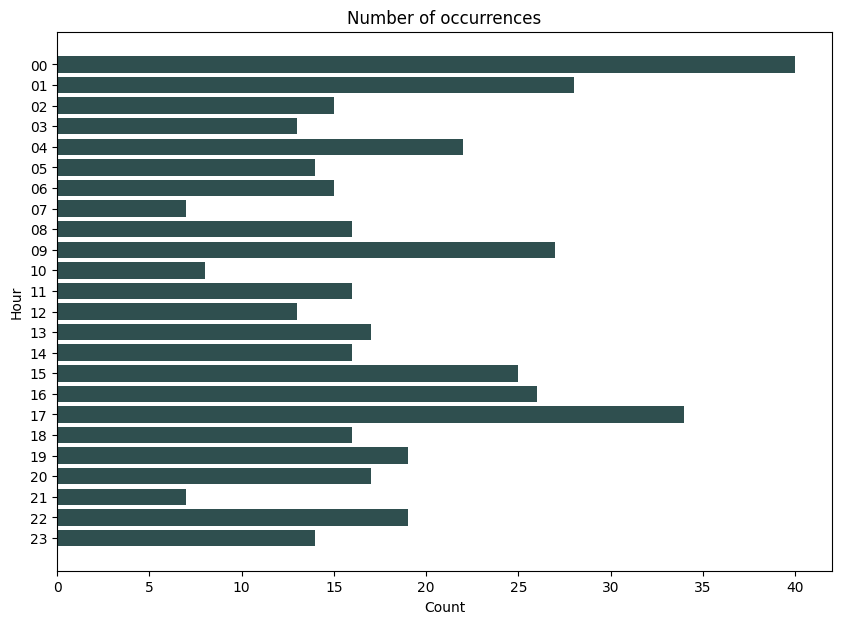

In [13]:
labels, values = zip(*hour_counts)

plt.figure(figsize=(10, 7))
plt.barh(labels, values, color="darkslategrey")

plt.gca().invert_yaxis()

plt.xlabel("Count")
plt.ylabel("Hour")
plt.title("Number of occurrences")

plt.show()

### Display month occurences

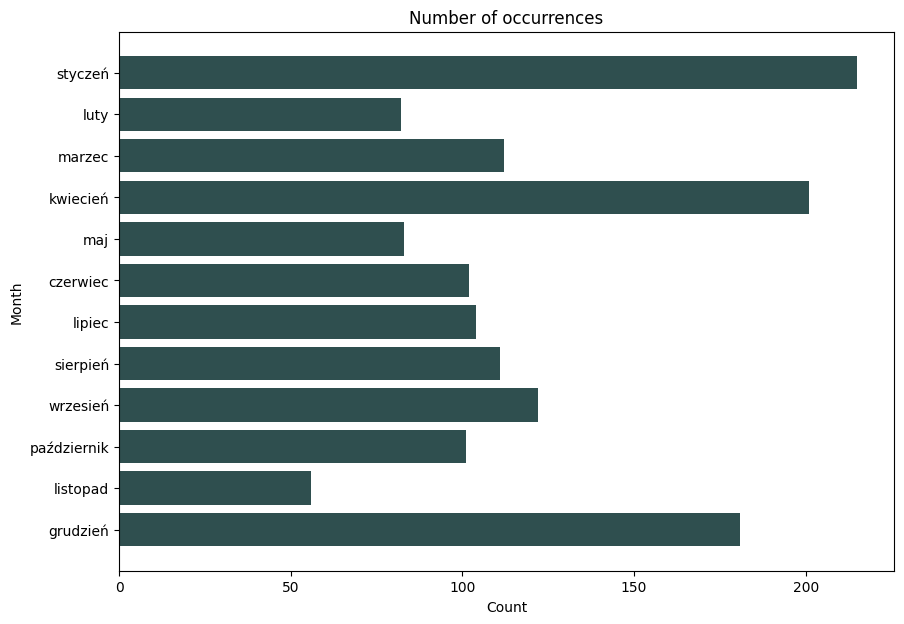

In [14]:
labels, values = zip(*month_counts)

plt.figure(figsize=(10, 7))
plt.barh(labels, values, color="darkslategrey")

plt.gca().invert_yaxis()

plt.xlabel("Count")
plt.ylabel("Month")
plt.title("Number of occurrences")

plt.show()

---

# 3. Finding April

In [15]:
april_regex = "kwie(?:cień|tni(?:u|em?|ów|o(?:wi|m)|a(?:ch|mi)?)?)"

# We only consider nouns.
# Adjectives will not be counted.
aprils = """ 
       kwiecień, kwietnie, 
       kwietnia, kwietni, kwietniów, 
       kwietniowi, kwietniom, 
       kwiecień, kwietnie, 
       kwietniem, kwietniami, 
       kwietniu, kwietniach, 
       kwietniu, kwietnie 
       """
re.findall(april_regex, aprils)

['kwiecień',
 'kwietnie',
 'kwietnia',
 'kwietni',
 'kwietniów',
 'kwietniowi',
 'kwietniom',
 'kwiecień',
 'kwietnie',
 'kwietniem',
 'kwietniami',
 'kwietniu',
 'kwietniach',
 'kwietniu',
 'kwietnie']

### Finding April in the dataset

In [16]:
all_april_occurrences = 0

for txt in texts:
    all_april_occurrences += len(re.findall(april_regex, txt))

all_april_occurrences

359

# 5. Find April and a date (number and space)

In [17]:
num_april_regex = "\d " + april_regex

all_april_dates = 0

for txt in texts:
    all_april_dates += len(re.findall(num_april_regex, txt))

all_april_dates

201

# 6. Find April without a date

In [18]:
just_april_regex = r"(?<!\d )" + april_regex

just_april_dates = 0

for txt in texts:
    just_april_dates += len(re.findall(just_april_regex, txt))

just_april_dates

158

In [19]:
all_april_dates + just_april_dates == all_april_occurrences

True

Great! We only see April with or without a date or other number, and with no space

# What will BIELIK say?

### Prompt 1:

Przepisz poniższą treść zadań na język polski. Nie tłumacz adresu url. Zostaw go jak jest 1. Devise two regular expressions: * extracting times, e.g. recognizing `20:30` as an instance of a time. * extracting dates, e.g. recognizing `20 września` as an instance of a date. 2. Search for occurrences of times and dates in the dataset. 3. Plot results from point 2: * for times create a bar plot for full hours. * for dates create a bar plot for months. 4. Compute the number of occurrences of `kwiecień` word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden). 5. As in 4, but preceded by a number and a space. 6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4. 7. Ask an LLM (e.g. [Bielik](https://chat.bielik.ai/)) to complete these tasks for you. Compare and criticize the code generated by the LLM.

### Response:

Oto przepisane zadania w języku polskim:

1. Opracuj dwa wyrażenia regularne:

- Wyrażenie do ekstrakcji czasów, np. rozpoznające 20:30 jako instancję czasu.
- Wyrażenie do ekstrakcji dat, np. rozpoznające 20 września jako instancję daty.
2. Wyszukaj wystąpienia czasów i dat w zbiorze danych.

3. Wyświetl wyniki z punktu 2:

- Dla czasów utwórz wykres słupkowy dla pełnych godzin.
- Dla dat utwórz wykres słupkowy dla miesięcy.
4. Oblicz liczbę wystąpień słowa kwiecień we wszystkich formach fleksyjnych. Użyj zwięzłej formy zapytania (łączenie wszystkich form słowa za pomocą alternatywy jest zabronione).

5. Jak w punkcie 4, ale poprzedzone liczbą i spacją.

6. Jak w punkcie 4, ale niepoprzedzone liczbą i spacją. Sprawdź, czy wyniki z punktów 5 i 6 sumują się do wyniku z punktu 4.

7. Poproś model językowy (np. Bielik) o wykonanie tych zadań za Ciebie. Porównaj i skrytykuj kod wygenerowany przez model językowy.


### Observations:

Despite the fact Bielik's UI didn't allow me to paste the text with spaces and newlines even though I added them in the chat window, the model was able to add them to make the text more readable.

---

# Prompt 2:

Wykonaj poniższe zadania. Dla podpunktów 1-6 napisz kod w języku Python, który będzie ich rozwiązaniem. W celu wykonania ostatniego zadania 7 wymyśl prompt, który można będzie podać modelowi BIELIK.

1. Opracuj dwa wyrażenia regularne:

- Wyrażenie do ekstrakcji czasów, np. rozpoznające 20:30 jako instancję czasu.
- Wyrażenie do ekstrakcji dat, np. rozpoznające 20 września jako instancję daty.
2. Wyszukaj wystąpienia czasów i dat w zbiorze danych.

3. Wyświetl wyniki z punktu 2:

- Dla czasów utwórz wykres słupkowy dla pełnych godzin.
- Dla dat utwórz wykres słupkowy dla miesięcy.
4. Oblicz liczbę wystąpień słowa kwiecień we wszystkich formach fleksyjnych. Użyj zwięzłej formy zapytania (łączenie wszystkich form słowa za pomocą alternatywy jest zabronione).

5. Jak w punkcie 4, ale poprzedzone liczbą i spacją.

6. Jak w punkcie 4, ale niepoprzedzone liczbą i spacją. Sprawdź, czy wyniki z punktów 5 i 6 sumują się do wyniku z punktu 4.

7. Poproś model językowy (np. Bielik) o wykonanie tych zadań za Ciebie. Porównaj i skrytykuj kod wygenerowany przez model językowy.

# Response:



# Zadanie 1: Wyrażenia regularne

1. Wyrażenie do ekstrakcji czasów:

In [20]:
import re

# Wyrażenie regularne do ekstrakcji czasów w formacie HH:MM
time_pattern = r'\d{1,2}:\d{2}'

2. Wyrażenie do ekstrakcji dat:

In [21]:
# Wyrażenie regularne do ekstrakcji dat w formacie dd mmm
date_pattern = '\d{1,2} \w+'

# Zadanie 2: Wyszukiwanie wystąpień czasów i dat

1. Przykładowy zbiór danych:

In [22]:
data = [
    "Spotkanie odbędzie się 20 września o 15:30.",
    "Wyjazd zaplanowano na 10 października o 9:00.",
    "Wydarzenie rozpocznie się 15 kwietnia o 18:00.",
    "Konferencja odbędzie się 25 maja o 11:45.",
    "Spotkanie zacznie się 1 czerwca o 13:15.",
    "Wyjazd zorganizowano na 30 czerwca o 8:00.",
    "Wydarzenie rozpocznie się 1 lipca o 16:30.",
    "Konferencja odbędzie się 15 sierpnia o 10:15.",
    "Spotkanie zacznie się 1 września o 14:45.",
    "Wyjazd zaplanowano na 20 września o 15:30."
]

2. Funkcja do wyszukiwania czasów i dat:

In [23]:
def find_times_and_dates(data):
    times = []
    dates = []
    
    for sentence in data:
        times_in_sentence = re.findall(time_pattern, sentence)
        dates_in_sentence = re.findall(date_pattern, sentence)
        
        times.extend(times_in_sentence)
        dates.extend(dates_in_sentence)
    
    return times, dates

# Zadanie 3: Wyświetlanie wyników

1. Wykres słupkowy dla czasów:

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_times(times):
    # Zliczanie wystąpień każdego czasu
    time_counts = Counter(times)
    
    # Tworzenie wykresu słupkowego
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(time_counts) + 1), list(time_counts.values()), tick_label=list(time_counts.keys()))
    plt.title('Wystąpienia czasów')
    plt.xlabel('Czas')
    plt.ylabel('Liczba wystąpień')
    plt.show()

2. Wykres słupkowy dla dat:

In [25]:
def plot_dates(dates):
    # Zliczanie wystąpień każdej daty
    date_counts = Counter(dates)
    
    # Tworzenie wykresu słupkowego
    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(date_counts) + 1), list(date_counts.values()), tick_label=list(date_counts.keys()))
    plt.title('Wystąpienia dat')
    plt.xlabel('Data')
    plt.ylabel('Liczba wystąpień')
    plt.show()

# Zadanie 4: Liczba wystąpień słowa kwiecień

In [26]:
def count_april_words(data):
    # Wyrażenie regularne do ekstrakcji słowa kwiecień w różnych formach
    april_pattern = r'\bkwiecień\b|\bkwietnia\b|\bkwietniu\b|\bkwietniem\b|\bkwietnia\b'
    
    # Zliczanie wystąpień
    count = sum(len(re.findall(april_pattern, sentence)) for sentence in data)
    
    return count

# Zadanie 5: Liczba wystąpień słowa kwiecień poprzedzonego liczbą i spacją

In [27]:
def count_april_words_with_number(data):
    # Wyrażenie regularne do ekstrakcji słowa kwiecień poprzedzonego liczbą i spacją
    april_pattern = r'\d+\s\bkwiecień\b|\d+\s\bkwietnia\b|\d+\s\bkwietniu\b|\d+\s\bkwietniem\b|\d+\s\bkwietnia\b'
    
    # Zliczanie wystąpień
    count = sum(len(re.findall(april_pattern, sentence)) for sentence in data)
    
    return count

# Zadanie 6: Liczba wystąpień słowa kwiecień niepoprzedzonego liczbą i spacją

In [28]:
def count_april_words_without_number(data):
    # Wyrażenie regularne do ekstrakcji słowa kwiecień niepoprzedzonego liczbą i spacją
    april_pattern = r'\bkwiecień\b|\bkwietnia\b|\bkwietniu\b|\bkwietniem\b|\bkwietnia\b'
    
    # Zliczanie wystąpień
    count = sum(len(re.findall(april_pattern, sentence)) for sentence in data)
    
    return count

# Prompt dla modelu Bielik

"""
Wykonaj następujące zadania:

1. Opracuj dwa wyrażenia regularne:
   - Wyrażenie do ekstrakcji czasów, np. rozpoznające 20:30 jako instancję czasu.
   - Wyrażenie do ekstrakcji dat, np. rozpoznające 20 września jako instancję daty.

2. Wyszukaj wystąpienia czasów i dat w zbiorze danych.

3. Wyświetl wyniki z punktu 2:
   - Dla czasów utwórz wykres słupkowy dla pełnych godzin.
   - Dla dat utwórz wykres słupkowy dla miesięcy.

4. Oblicz liczbę wystąpień słowa kwiecień we wszystkich formach fleksyjnych. Użyj zwięzłej formy zapytania (łączenie wszystkich form słowa za pomocą alternatywy jest zabronione).

5. Jak w punkcie 4, ale poprzedzone liczbą i spacją.

6. Jak w punkcie 4, ale niepoprzedzone liczbą i spacją. Sprawdź, czy wyniki z punktów 5 i 6 sumują się do wyniku z punktu 4.

Proszę, wygeneruj kod Python do

---

# Observations

The output of the last cell was unfinished. It's a common issue for language models I have worked with so far. OpenAI's GPT was an exception.

Because the task prompt didn't provide information about used dataset the model was able to creat its own synthetic data. Unfortunately the generated data doesn't include elements that could potentially enable the user to find errors or debug the code. It's possible that model assumed it's presentation purpose only.

The model was very exact in the regex it created for finding date and time. It only creted regex to match exactly the data in the format provided ignoring the "for example" instruction:

- Wyrażenie do ekstrakcji czasów, **np.** rozpoznające 20:30 jako instancję czasu.
- Wyrażenie do ekstrakcji dat, **np.** rozpoznające 20 września jako instancję daty.

Moreover, it created a month regex as `'\d{1,2} \w+'` which enables non-month data to be detected. For example `"12 apostołów"`. It didn't include constrains for data format such as minutes only being in range `00-60`

Bielik ignored the instruction that forbade it from using an alternative of correct words:

4. Oblicz liczbę wystąpień słowa kwiecień we wszystkich formach fleksyjnych. Użyj zwięzłej formy zapytania (łączenie wszystkich form słowa za pomocą alternatywy jest zabronione).

The model didn't write code that would execute the functions so let's try to do it on our own.

We can see that in the task 

In [29]:
times, dates = find_times_and_dates(data)

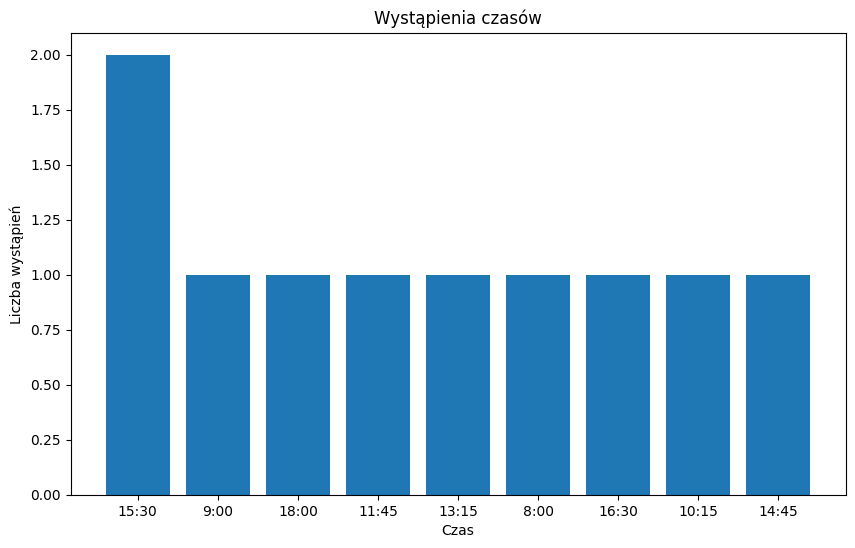

In [30]:
plot_times(times)

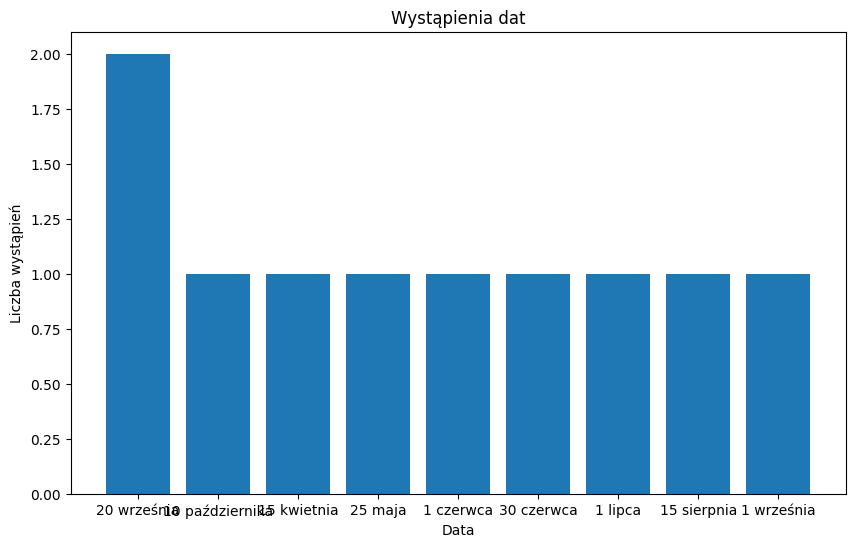

In [31]:
plot_dates(dates)

In [32]:
count_april_words(data)

1

In [33]:
count_april_words_with_number(data) + count_april_words_without_number(data)

2

# Observations

The plot is ugly! The first one is acceptable, but the 2nd one has overlapping text.

The plots include bars for specific hours and specific dates instead of full hour and month bins that would gather instances from an hour and month.

The output of the final task is incorrect. The written code didn't exclude matches with a number before it.

My code is so much better!

# Inception - One step further

Out of curiosity I decided to input the prompt generated by BIELIK into BIELIK.

This is the result:

Oto kod Python, który realizuje wszystkie zadania:


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (3,).

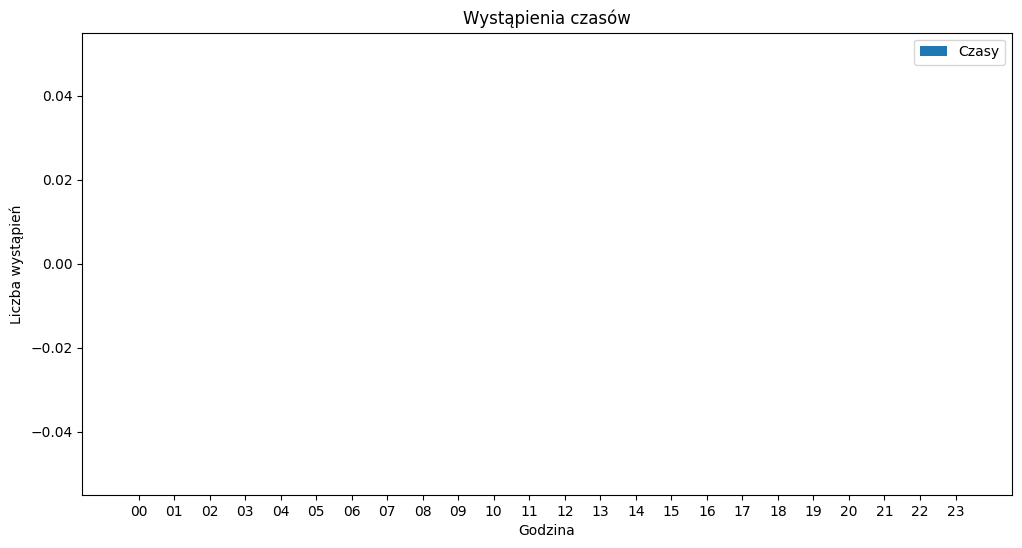

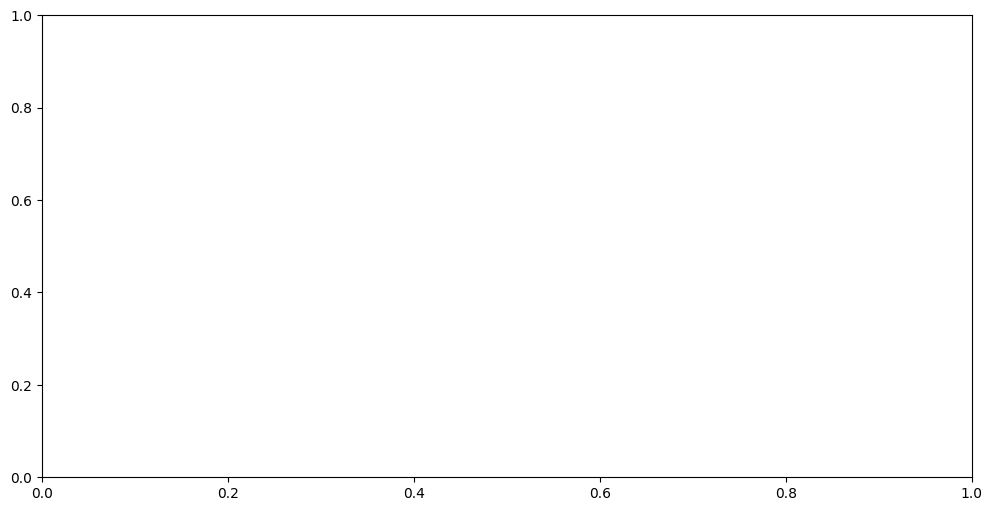

In [34]:
import re
import matplotlib.pyplot as plt
from collections import Counter

# Dane wejściowe
data = """
10 kwietnia 2023, 15:30
20 września 2022, 12:00
30 kwietnia 2021, 9:45
15 maja 2020, 18:00
5 kwietnia 2019, 16:15
10 kwietnia 2023, 15:30
"""

# Wyrażenia regularne
time_pattern = r'\d{1,2}:\d{2}'
date_pattern = r'\d{1,2} (stycznia|lutego|marca|kwietnia|maja|czerwca|lipca|sierpnia|września|października|listopada|grudnia) \d{4}'

# Ekstrakcja czasów i dat
times = re.findall(time_pattern, data)
dates = re.findall(date_pattern, data)

# Tworzenie słowników dla wykresów
time_counts = Counter(times)
date_counts = Counter(dates)

# Obliczanie liczby wystąpień słowa "kwiecień" we wszystkich formach fleksyjnych
fleksyjne_kwiecień = sum(1 for word in data.split() if word.lower() == "kwiecień")

# Obliczanie liczby wystąpień słowa "kwiecień" poprzedzonego liczbą i spacją
liczba_kwiecień = sum(1 for word in data.split() if word.lower() == "kwiecień" and word.startswith("1") or word.startswith("2") or word.startswith("3") or word.startswith("4") or word.startswith("5") or word.startswith("6") or word.startswith("7") or word.startswith("8") or word.startswith("9"))

# Obliczanie liczby wystąpień słowa "kwiecień" niepoprzedzonego liczbą i spacją
bez_liczby_kwiecień = sum(1 for word in data.split() if word.lower() == "kwiecień" and not word.startswith("1") and not word.startswith("2") and not word.startswith("3") and not word.startswith("4") and not word.startswith("5") and not word.startswith("6") and not word.startswith("7") and not word.startswith("8") and not word.startswith("9"))

# Tworzenie wykresów
plt.figure(figsize=(12, 6))
plt.bar(range(24), [time_counts[str(i)] for i in range(24)], width=0.8, label="Czasy")
plt.xticks(range(24), [f"{i:02d}" for i in range(24)])
plt.xlabel("Godzina")
plt.ylabel("Liczba wystąpień")
plt.title("Wystąpienia czasów")
plt.legend()

plt.figure(figsize=(12, 6))
plt.bar(range(12), [date_counts[date] for date in date_counts], width=0.8, label="Daty")
plt.xticks(range(12), ["Styczeń", "Luty", "Marzec", "Kwiecień", "Maj", "Czerwiec", "Lipiec", "Sierpień", "Wrzesień", "Październik", "Listopad", "Grudzień"])
plt.xlabel("Miesiąc")
plt.ylabel("Liczba wystąpień")
plt.title("Wystąpienia dat")
plt.legend()

# Wyświetlanie wyników
print(f"Liczba wystąpień słowa 'kwiecień' we wszystkich formach fleksyjnych: {fleksyjne_kwiecień}")
print(f"Liczba wystąpień słowa 'kwiecień' poprzedzonego liczbą i spacją: {liczba_kwiecień}")
print(f"Liczba wystąpień słowa 'kwiecień' niepoprzedzonego liczbą i spacją: {bez_liczby_kwiecień}")
print(f"Suma wyników z punktów 5 i 6: {liczba_kwiecień + bez_liczby_kwiecień}")

plt.show()

Ten kod realizuje wszystkie zadania:

Definiuje wyrażenia regularne do ekstrakcji czasów i dat.
Ekstrahuje czasy i daty z podanych danych.
Tworzy wykresy słupkowe dla czasów i dat.
Oblicza liczbę wystąpień słowa "kwiecień" we wszystkich formach fleksyjnych.
Oblicza liczbę wystąpień słowa "kwiecień" poprzedzonego liczbą i spacją.
Oblicza liczbę wystąpień słowa "kwiecień" niepoprzedzonego liczbą i spacją.
Sprawdza, czy suma wyników z punktów 5 i 6 jest równa wynikowi z punktu 4.
Wyświetla wyniki i wykresy.
Pamiętaj, że dane wejściowe (zmienna data) są przykładowe i możesz je zastąpić własnym zbiorem danych.

To no surprise it results in errors

There's an observation to be made - the model changed the string naming convention. Before it only used the quotation mark only for the input data while for everything else it used apostrophes.

In the new code it uses exclusively quotation mark strings.

It's really fun to watch the loss of code quality:

```python
bez_liczby_kwiecień = sum(1 for word in data.split() if word.lower() == "kwiecień" and not word.startswith("1") and not word.startswith("2") and not word.startswith("3") and not word.startswith("4") and not word.startswith("5") and not word.startswith("6") and not word.startswith("7") and not word.startswith("8") and not word.startswith("9"))
```

Fortunately the previous Bielik response didn't generate the task 7. prompt for Bielik that would tempt me to input the task again and see what happens. 